In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn import decomposition
from sklearn import datasets

<br>
<br>

#### 1. (붓꽃 데이터) 데이터 읽어들이기 

In [2]:
iris = datasets.load_iris()
x = iris.data
y = iris.target

In [3]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

<br>
<br>

#### 2. 비어있는 모델 객체 만들기

In [3]:
model = decomposition.PCA(?=1) 

<br>
<br>

#### 3. 모델 객체 학습시키기

In [7]:
model.fit(x)
x1 = model.transform(x) # 모델에 맞춰서 원래 데이터를 차원이동 시켜줍니다.

In [8]:
x1[:10]

array([[-2.68420713],
       [-2.71539062],
       [-2.88981954],
       [-2.7464372 ],
       [-2.72859298],
       [-2.27989736],
       [-2.82089068],
       [-2.62648199],
       [-2.88795857],
       [-2.67384469]])

<br>
<br>

#### 4. 모델 시각화 

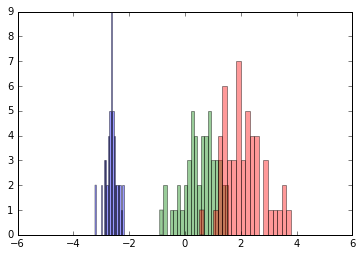

In [9]:
# pip install seaborn
import seaborn as sns

# bins : Specification of hist bins, or None to use Freedman-Diaconis rule.
# kde : Whether to plot a gaussian kernel density estimate
sns.distplot(x1[y==0], color="b", bins=20, kde=False)
sns.distplot(x1[y==1], color="g", bins=20, kde=False)
sns.distplot(x1[y==2], color="r", bins=20, kde=False)

plt.xlim(-6, 6)

plt.show()

<br>
<br>

#### 2. 비어있는 모델 객체 만들기 + 3. 모델 객체 학습시키기

In [ ]:
model = decomposition.PCA(n_components=3)
model.fit(x)
x = model.?(x)

x

<br>
<br>

#### 4. 모델 시각화 

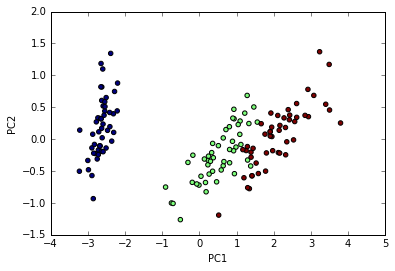

In [12]:
# PCA plot of 2 PCs

plt.scatter(x[:, 0], x[:, 1], c=iris.target)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

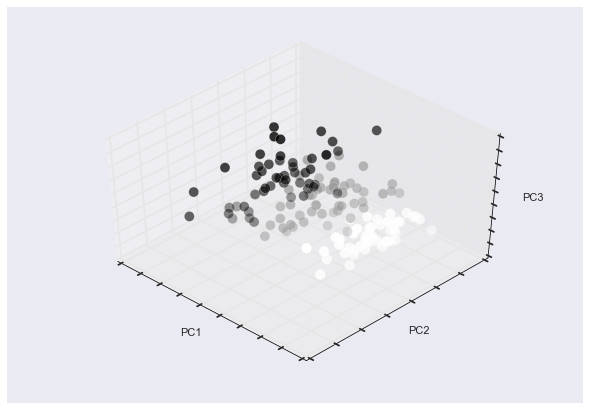

In [65]:
# PCA plot of 3 PCs

fig = plt.figure()
ax = Axes3D(fig, elev=48, azim=134) # Set the elevation and azimuth of the axes. (축의 고도와 방위각)

ax.scatter(x[:, 0], x[:, 1], x[:, 2], c=iris.target, edgecolor='w', s=100)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.dist = 12 # 값이 커지면 전체 plot 이 작아짐

plt.show()

#### (Extra) 5. 몇 개의 PC 면 충분할까?

In [7]:
# 각각의 새로운 축이 데이터셋의 분산(variance)을 얼마나 표현하는지 확인이 가능
# [PC1, PC2, PC3, ...]

# Hint: Explain variance
model.?

array([0.92461621, 0.05301557, 0.01718514])

In [8]:
# 몇 개의 PC면 충분할까?
# np.argmax : 최대값의 인덱스를 리턴
# np.cumsum : 누적된 합계를 계산

np.argmax(np.cumsum(model.?) >= 0.95 ) + 1
# 95% 이상의 variance 를 설명하기 위한 축의 갯수를 확인할 수 있음

2

In [9]:
# ex) Boston house dataset의 경우,

boston = datasets.load_boston()
x = boston.data
y = boston.target

In [10]:
model = decomposition.PCA(n_components=10)
model.fit(x)
x = model.transform(x)

In [11]:
model.explained_variance_ratio_

array([8.05814643e-01, 1.63050854e-01, 2.13486883e-02, 6.95695814e-03,
       1.30786367e-03, 7.27742761e-04, 4.20024207e-04, 2.48721489e-04,
       8.53904192e-05, 3.08110199e-05])

In [12]:
print(model.explained_variance_ratio_[0])

0.8058146434977045


In [13]:
np.argmax(np.cumsum(model.explained_variance_ratio_) >= 0.95 ) + 1

2

In [ ]:
# Better option (indicate the ratio of variance you wish to preserve)

iris = datasets.load_iris()
x = iris.data
y = iris.target

model = decomposition.PCA(n_components=0.95) # Explains 95% of total variance
model.fit(x)
x = model.transform(x)
x